<a href="https://colab.research.google.com/github/pavankalyan066/DL-Notebooks/blob/main/Architecture_of_Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yolov5 Architecture

YOLO (You Only Look Once) models are used for Object detection with high performance. It divides an image into a grid system, and each grid detects objects within itself. They can be used for real-time object detection based on the data streams. They require very few computational resources.

In this notebook, we go through analysis YOLOv4 so that it’s easy to understand YOLOv5.

To understand how Yolov5 improved the performance and its architecture, let us go through the following high-level Object detection architecture:

![1_e17LeKXUsSxdNTlSm_Cz8w.png](https://miro.medium.com/max/700/1*e17LeKXUsSxdNTlSm_Cz8w.png)



In [ ]:
from IPython.display import Image

General Object Detector will have a backbone for pre-training it and a head to predict classes and bounding boxes. The Backbones can be running on GPU or CPU platforms. The Head can be either one-stage (e.g., YOLO, SSD, RetinaNet) for Dense prediction or two-stage (e.g., Faster R-CNN ) for the Sparse prediction object detector. Recent Object detectors have some layers (Neck) to collect feature maps, and it is between the backbone and the Head.

In YOLOv4, CSPDarknet53 is used as a backbone and SPP block for increasing the receptive field, which separates the significant features, and there is no reduction of the network operation speed. PAN is used for parameter aggregation from different backbone levels. YOLOv3 (anchor-based) head is used for YOLOv4.

YOLOv4 introduced new methods of data augmentation Mosaic and Self-Adversarial Training (SAT). Mosaic mixes four training images. Self-Adversarial Training operates in two forward and backward stages. In the 1st stage, the network alters the only image instead of the weights. In the second stage, the network is trained to detect an object on the modified image.



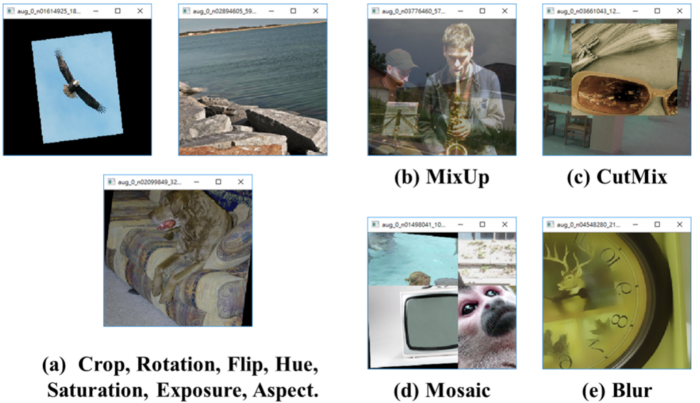

In [ ]:
from IPython.display import Image
Image('/content/1_RNgpODBkfuMe1--_Gfb3FQ.png')

Apart from the above-mentioned modules, some existing methods (Spatial Attention Module[SAM], PAN, CBN) have been modified to improve the performance.

Yolov5 almost resembles Yolov4 with some of the following differences:
- Yolov4 is released in the Darknet framework, which is written in C. Yolov5 is based on the PyTorch framework.
- Yolov4 uses .cfg for configuration whereas Yolov5 uses .yaml file for configuration.


![image.png](https://miro.medium.com/max/1400/1*mAxsoIEeLNM_2TP-n6vTew.png)

**Activation Function**

The choice of activation functions is most crucial in any deep neural network. Recently lots of activation functions have been introduced like Leaky ReLU, mish, swish, etc.

YOLO v5 authors decided to go with the Leaky ReLU and Sigmoid activation function.

In YOLO v5 the Leaky ReLU activation function is used in middle/hidden layers and the sigmoid activation function is used in the final detection layer. You can verify it here.

**Optimization Function**

For optimization function in YOLO v5, we have two options

- SGD
- Adam

In YOLO v5, the default optimization function for training is SGD.

However, you can change it to Adam by using the “ — — adam” command-line argument.

**Cost Function or Loss Function**

In the YOLO family, there is a compound loss is calculated based on objectness score, class probability score, and bounding box regression score.

Ultralytics have used Binary Cross-Entropy with Logits Loss function from PyTorch for loss calculation of class probability and object score.

We also have an option to choose the Focal Loss function to calculate the loss. You can choose to train with Focal Loss by using fl_gamma hyper-parameter.

Weights, Biases, Parameters, Gradients, and Final Model Summary


Model Summary: 191 layers, 7.46816e+06 parameters, 7.46816e+06 gradients